In [55]:
# importing general necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Model and Scaling
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [56]:
# importing the dataset and making some adjustments so it works with the model and the time series split
df = pd.read_csv("../data/combined_dataset_temp.csv").drop(columns=["Unnamed: 0", "GAUL", "M49"])
df["Casualties"] = df["Casualties"].fillna(0)
df["Undernourishment (%)"] = df["Undernourishment (%)"].replace({"<2.5": 0})

df["Undernourishment (%)"] = pd.to_numeric(df["Undernourishment (%)"]).shift(periods=-1)
df = df.drop(index=df.index[19::20])
df = df.dropna().sort_values("Year")

df["Undernourishment (%)"] = df["Undernourishment (%)"].apply(lambda x: x*10)
df["Undernourishment (%)"] = df["Undernourishment (%)"].astype(int)

In [57]:
# Creating X and y and scaling
sc = StandardScaler()

df_model_all_f = df.drop(columns=["Area", "Year"])
df_model_best_f = df.drop(columns=["Area", "Year", "GDP (MUSD)", "Food Prod. Index"])

df_model_x_all = sc.fit_transform(df_model_all_f[["GDP (MUSD)", "GNI (MUSD)", "Food Prod. Index", "Temperature", "Precipitation", "NDVI", "Casualties"]])
df_model_x_all = pd.DataFrame(df_model_x_all, columns=["GDP (MUSD)", "GNI (MUSD)", "Food Prod. Index", "Temperature", "Precipitation", "NDVI", "Casualties"])

df_model_x_best = sc.fit_transform(df_model_best_f[["GNI (MUSD)", "Temperature", "Precipitation", "NDVI", "Casualties"]])
df_model_x_best = pd.DataFrame(df_model_x_best, columns=["GNI (MUSD)", "Temperature", "Precipitation", "NDVI", "Casualties"])

df_model_y = sc.fit_transform(df_model_all_f["Undernourishment (%)"].array.reshape(-1, 1))
df_model_y = pd.DataFrame(df_model_y, columns=["Undernourishment (%)"])

X_all = df_model_x_all
X_best = df_model_x_best
y = df_model_y["Undernourishment (%)"]

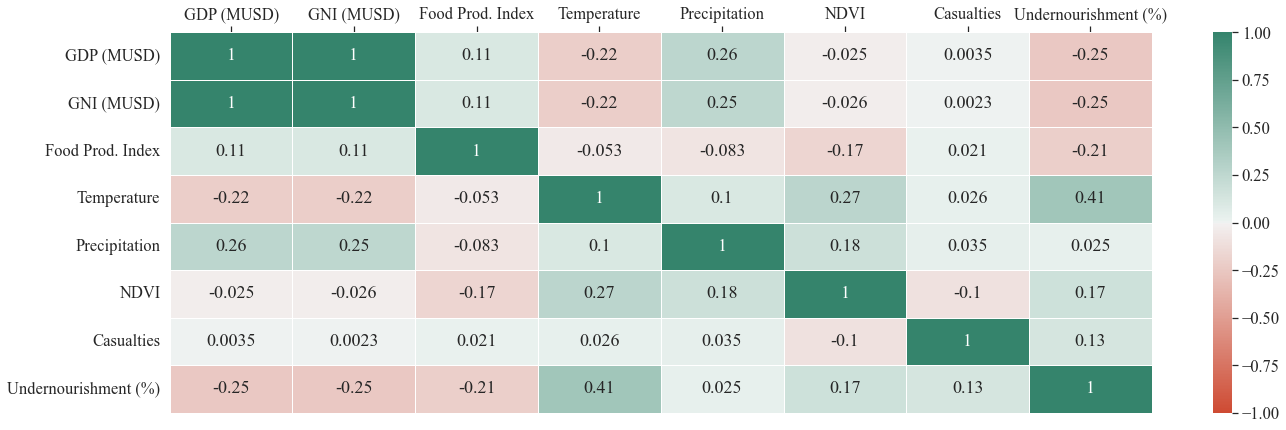

In [116]:
# correlations of each feature in the dataset including the target variable
corrmat = df_model_all_f.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(22,7))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap=sns.diverging_palette(377, 160, s=80, as_cmap=True),linewidth=.5, vmin=-1, vmax=1)
g.xaxis.tick_top()

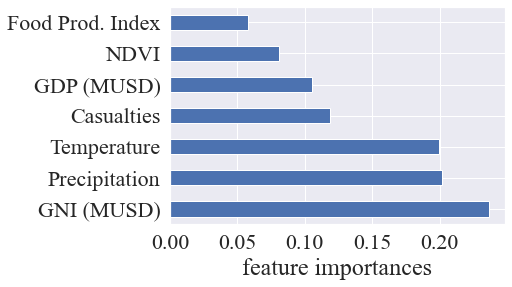

<Figure size 2000x2000 with 0 Axes>

In [59]:
# feature importances in the model later used (all features)
model = RandomForestRegressor()
model.fit(X_all, y)

feat_importances = pd.Series(model.feature_importances_, index=X_all.columns)
feat_importances.nlargest(7).plot(kind='barh')
plt.xlabel("feature importances")
plt.figure(figsize=(10, 10), dpi=200)
plt.show()

[['GDP (MUSD)', 0.1184], ['Food Prod. Index', 0.0546], ['GNI (MUSD)', 0.3406], ['Temperature', 0.219], ['Precipitation', 0.2197], ['NDVI', 0.0972], ['Casualties', 0.1235]]


[Text(0, 0, '0.3406'),
 Text(0, 0, '0.2197'),
 Text(0, 0, '0.219'),
 Text(0, 0, '0.1235'),
 Text(0, 0, '0.1184'),
 Text(0, 0, '0.0972'),
 Text(0, 0, '0.0546')]

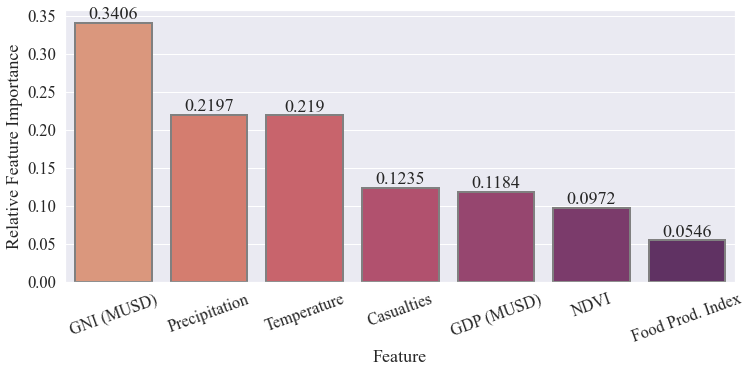

In [76]:
# Same data with another visualization
feature_list = [['GDP (MUSD)', 0.1184], 
    ['Food Prod. Index', 0.0546], 
    ['GNI (MUSD)', 0.3406], 
    ['Temperature', 0.2190], 
    ['Precipitation',0.2197], 
    ['NDVI',0.0972], 
    ['Casualties',0.1235]]
feature_df = pd.DataFrame(feature_list, columns = ['Feature', 'Relative Feature Importance'])
print(feature_list)

feature_df = feature_df.sort_values(['Relative Feature Importance'], ascending=False)

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=1.5)
plt.figure(figsize=(12, 5))
ax = sns.barplot(data = feature_df,x='Feature',y='Relative Feature Importance',palette="flare", capsize=.9,
linewidth=2, edgecolor="0.5")

for item in ax.get_xticklabels():
    item.set_rotation(20)

ax.bar_label(ax.containers[0])

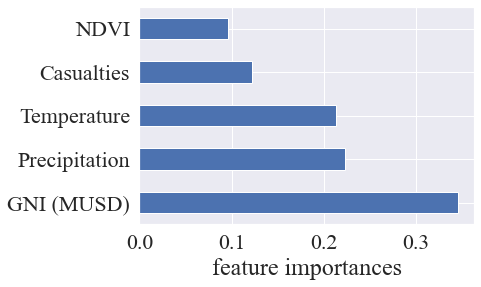

<Figure size 2000x2000 with 0 Axes>

In [61]:
# feature importances in the model later used (excluding GDP and Food Production Index)
model = RandomForestRegressor()
model.fit(X_best, y)

feat_importances = pd.Series(model.feature_importances_, index=X_best.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.xlabel("feature importances")
plt.figure(figsize=(10, 10), dpi=200)
plt.show()

[['GNI (MUSD)', 0.340603], ['Temperature', 0.21902], ['Precipitation', 0.219676], ['NDVI', 0.097202], ['Casualties', 0.123499]]


[['GNI (MUSD)', 0.340603], ['Temperature', 0.21902], ['Precipitation', 0.219676], ['NDVI', 0.097202], ['Casualties', 0.123499]]


[Text(0, 0, '0.340603'),
 Text(0, 0, '0.219676'),
 Text(0, 0, '0.21902'),
 Text(0, 0, '0.123499'),
 Text(0, 0, '0.097202')]

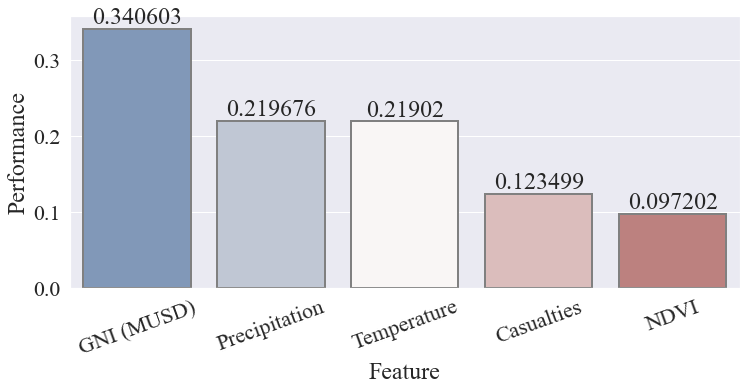

In [62]:
# Same data with another visualization
feature_list = [['GNI (MUSD)', 0.340603], ['Temperature', 0.219020], ['Precipitation',0.219676], ['NDVI',0.097202], ['Casualties',0.123499]]
feature_df = pd.DataFrame(feature_list, columns = ['Feature', 'Performance'])
print(feature_list)

feature_df = feature_df.sort_values(['Performance'], ascending=False)

sns.set_theme(style="darkgrid", font='Times New Roman', font_scale=2)
plt.figure(figsize=(12, 5))
ax = sns.barplot(data = feature_df,x='Feature',y='Performance',palette="vlag", capsize=.9,
linewidth=2, edgecolor="0.5")

for item in ax.get_xticklabels():
    item.set_rotation(20)

ax.bar_label(ax.containers[0])
